# 1. 필요 library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb
import shap
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
warnings.simplefilter(action='ignore')

# 2. Data 불러오기

## Data Dictionary

- index : 구분자
- quality : 품질
- fixed acidity : 산도
- volatile acidity : 휘발성산
- citric acid : 시트르산
- residual sugar : 잔당 (발효 후 와인 속에 남아있는 당분)
- chlorides : 염화물
- free sulfur dioxide : 독립 이산화황
- total sulfur dioxide : 총 이산화황
- density : 밀도
- pH : 수소이온농도
- sulphates : 황산염
- alcohol : 도수
- type : 종류

In [31]:
train_data = pd.read_csv("./train.csv")
train_data

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [4]:
train_data.info() #데이터 자료형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [5]:
train_data.isna().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [6]:
train_data.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [7]:
train_data.describe(include=['O']) #범주형 데이터 확인

,type
count,5497
unique,2
top,white
freq,4159


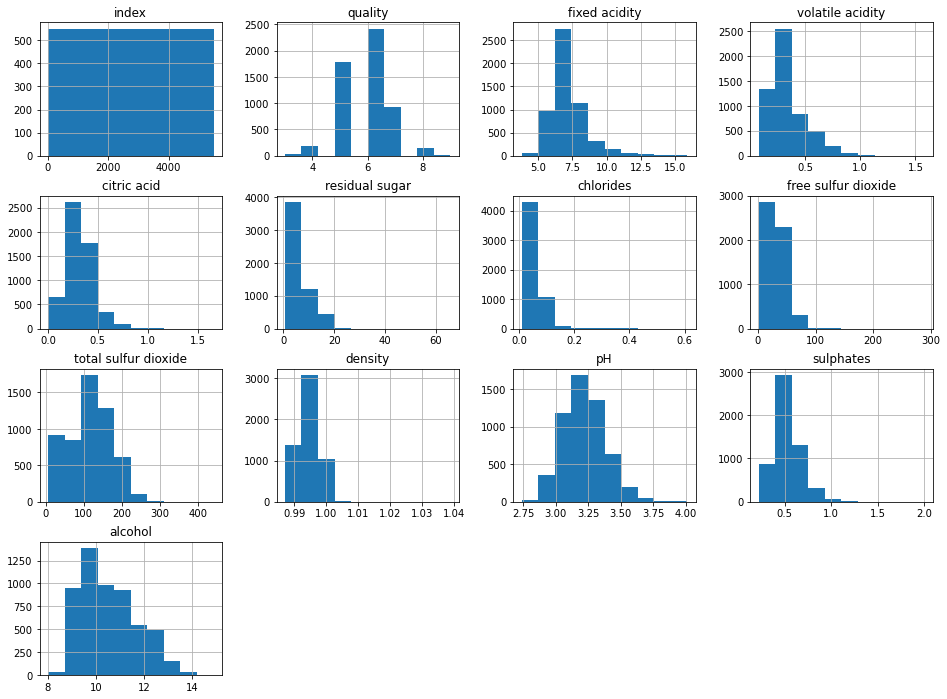

In [8]:
train_data.hist(figsize = (16, 12))
plt.show()

- id를 제외한 다른 지표들의 단위가 다 다르므로 추후 정규화 진행 예정
- 등급, id 제외 유사한 분포를 가지는 속성들이 있는 것을 확인

# 3. Data 분석

In [9]:
train_data['type'].unique()

array(['white', 'red'], dtype=object)

In [32]:
lab_enc = LabelEncoder()
train_data['type'] = lab_enc.fit_transform(train_data['type'])
train_data['type'].unique()

array([1, 0])

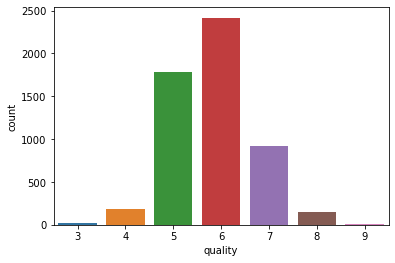

In [11]:
sns.countplot(x=train_data['quality'])
plt.show()

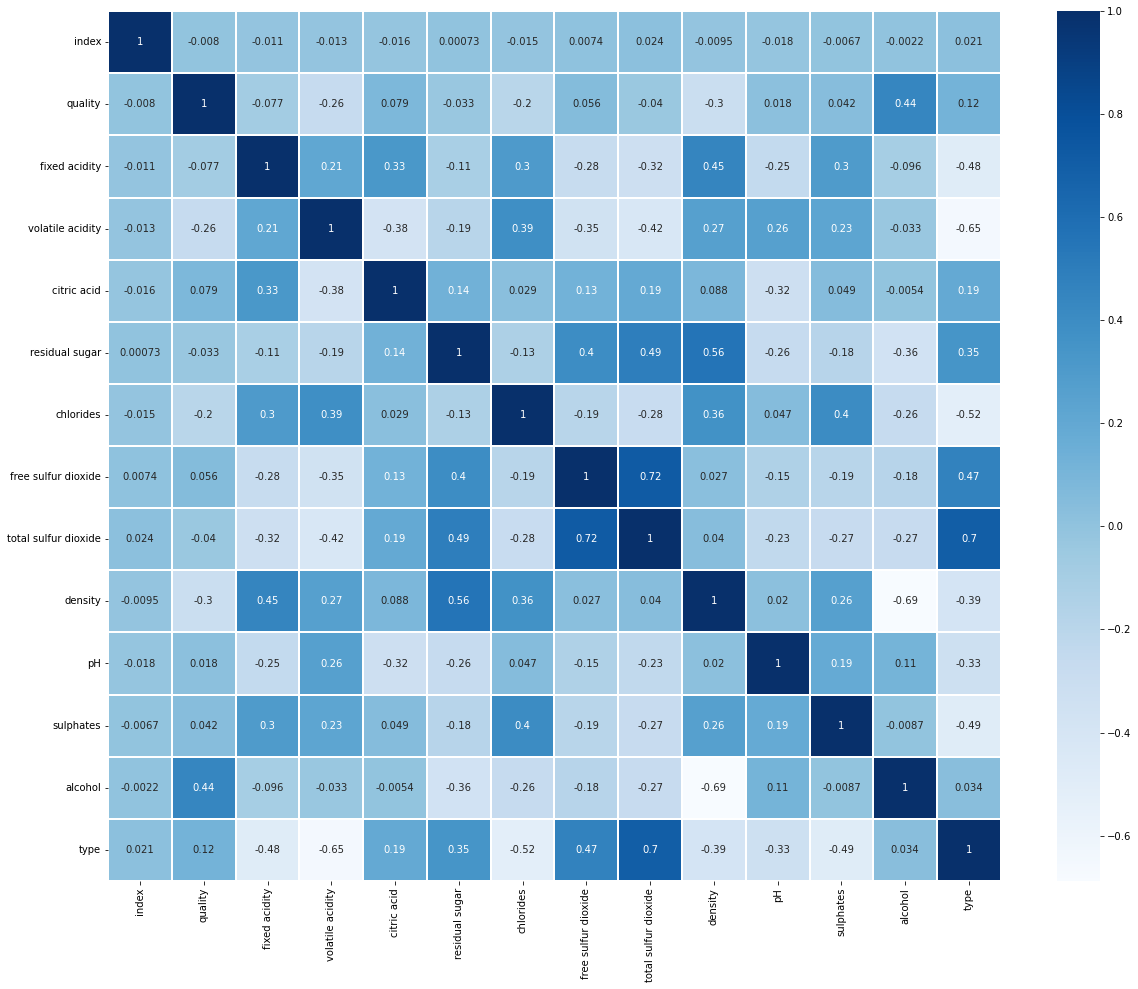

In [12]:
plt.figure(figsize = (20, 16))
x = sns.heatmap(train_data.corr(), cmap = 'Blues', linewidths = '0.1',annot = True)

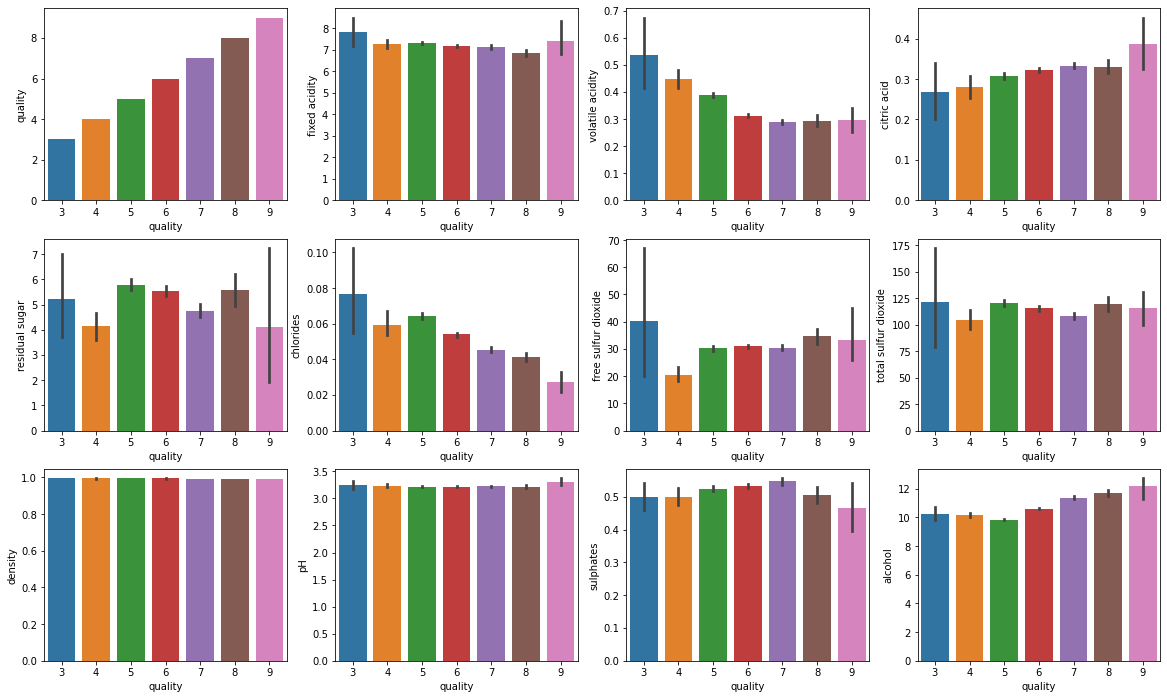

In [13]:
# train에서 각 변수와 quality 변수 사이 분포를 확인합니다.
plt.figure(figsize=(20, 12))
for i in range(1, 13):
    plt.subplot(3,4,i)
    sns.barplot(x = 'quality', y = train_data.columns[i], data = train_data)

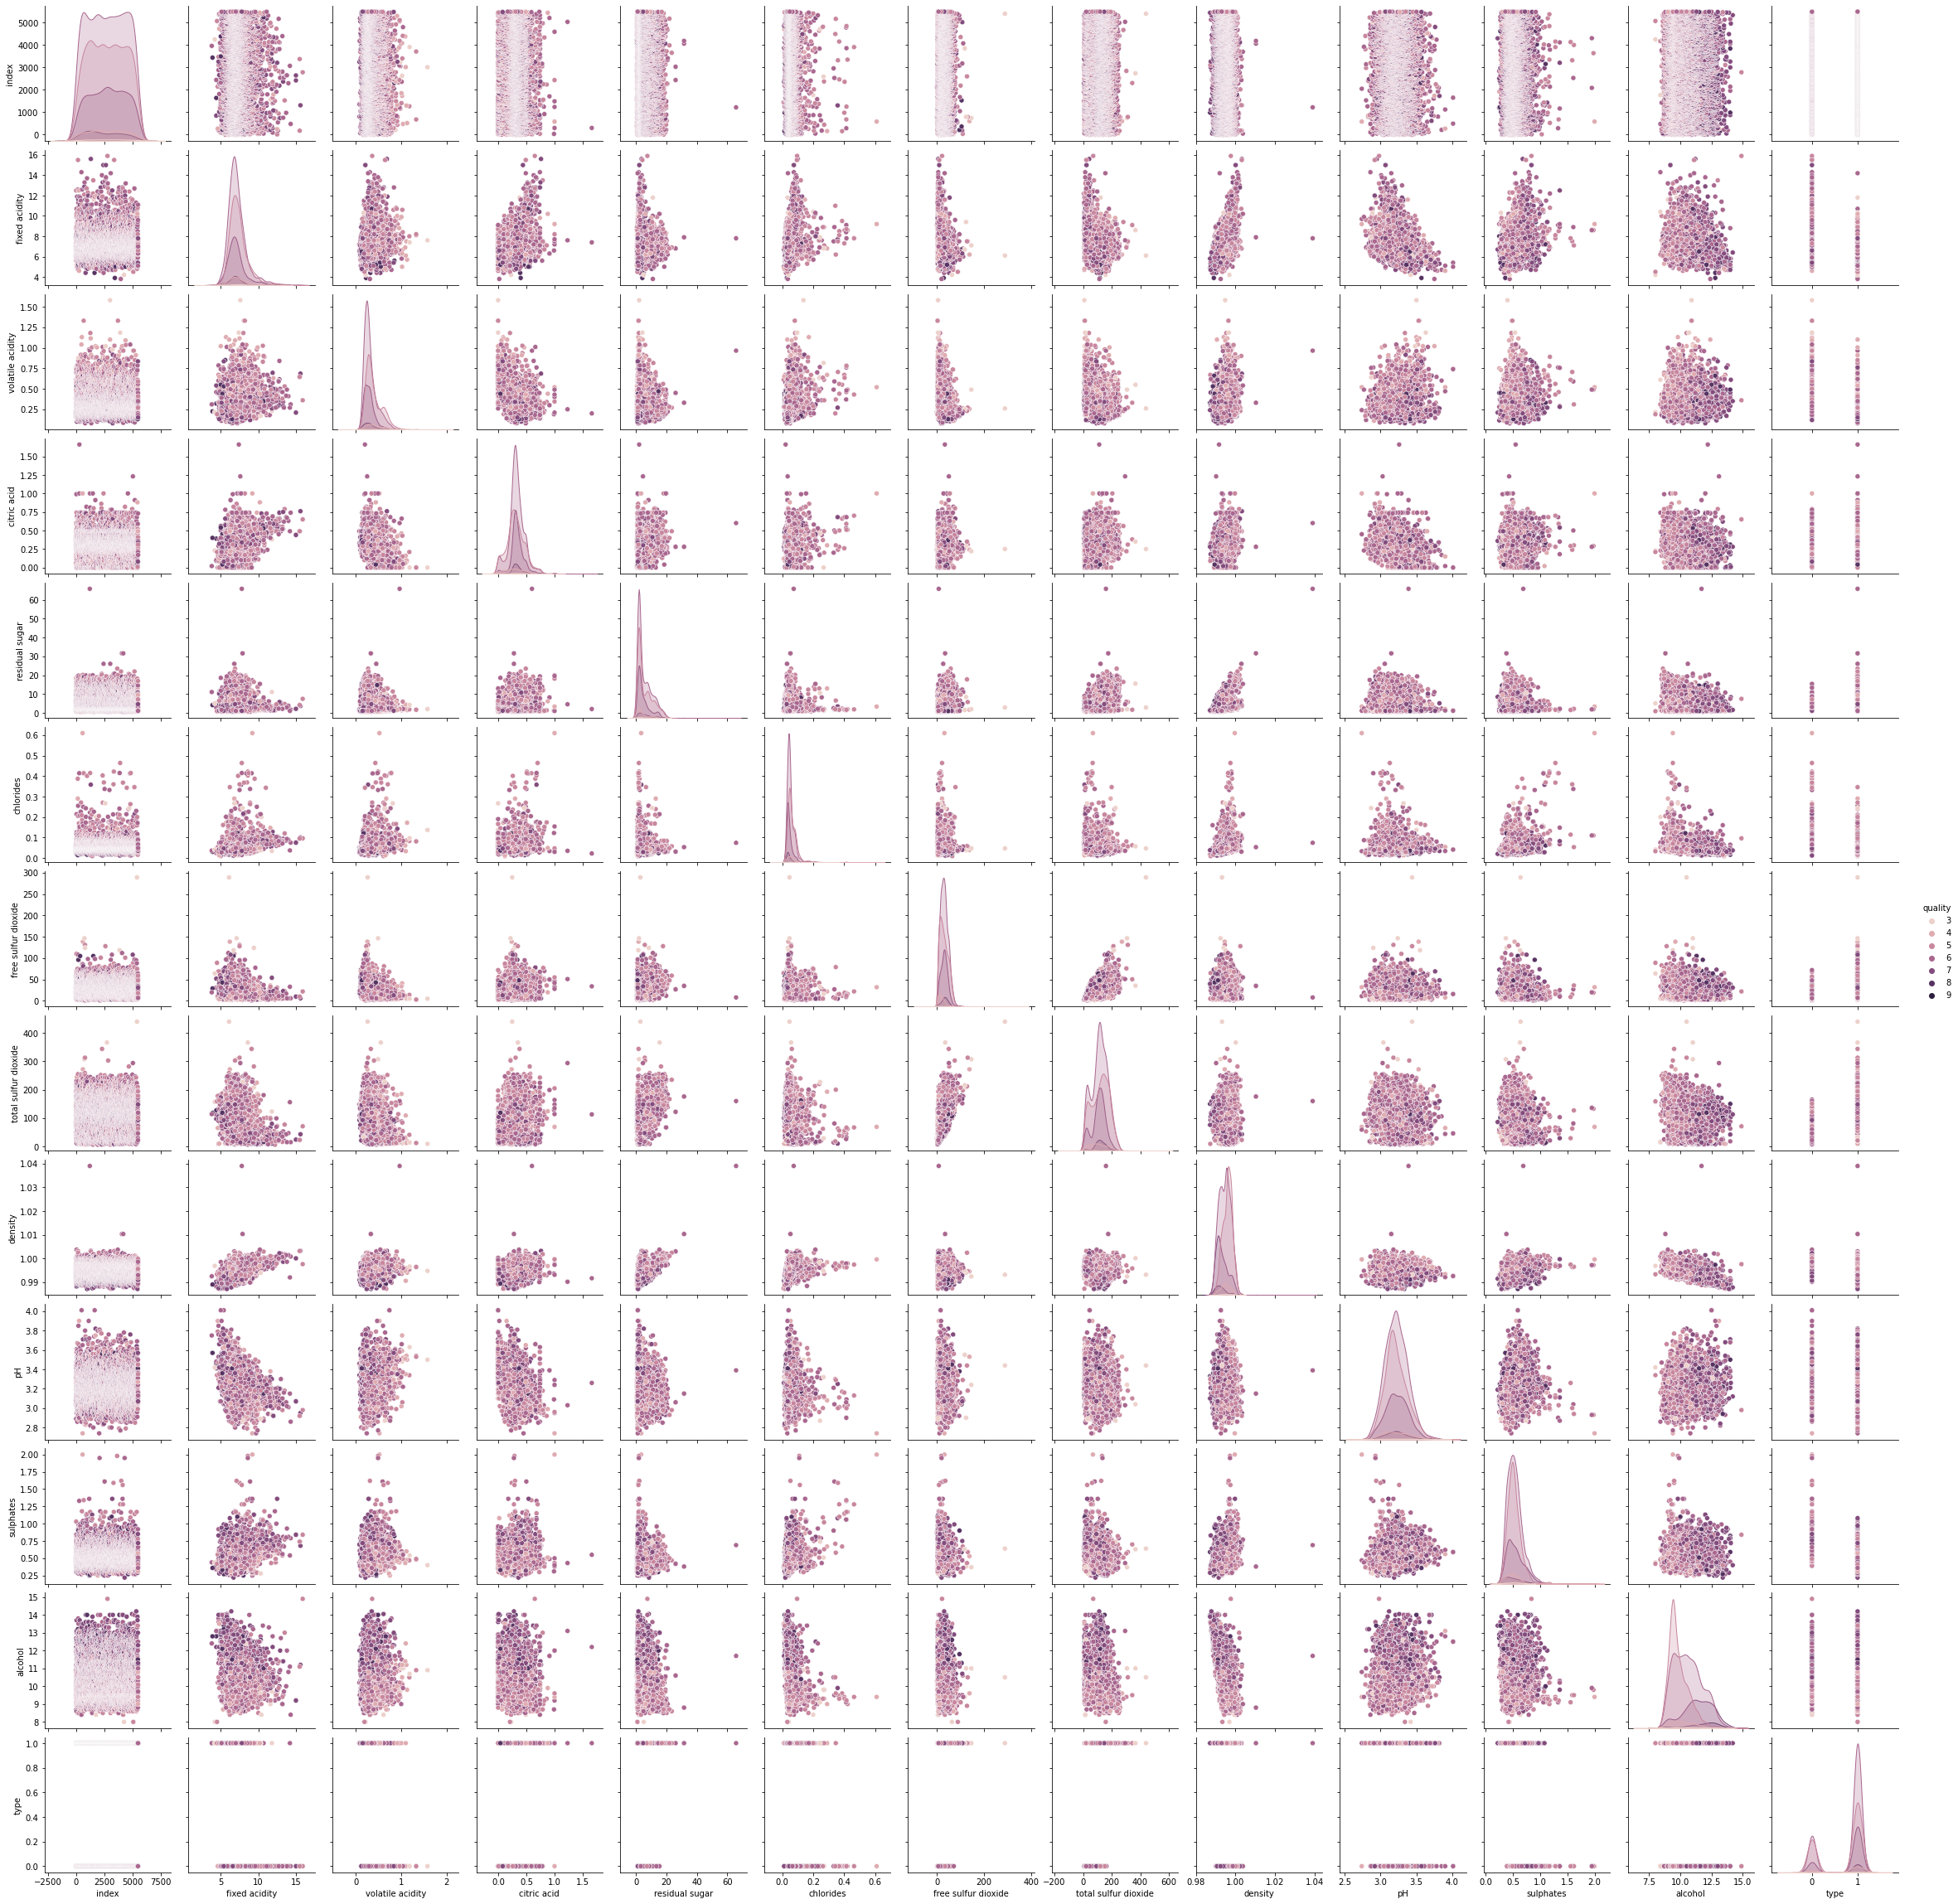

In [67]:
sns.pairplot(train_data, hue='quality')
plt.show()

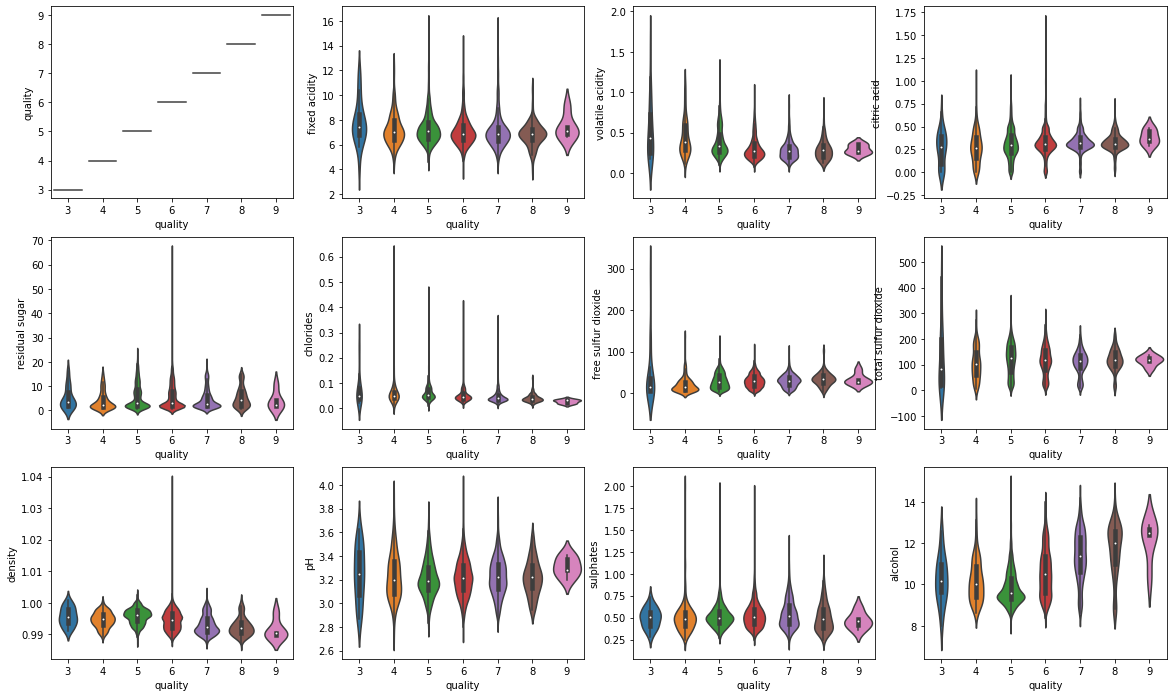

In [14]:
plt.figure(figsize=(20, 12))
for i in range(1, 13):
    plt.subplot(3,4,i)
    sns.violinplot(x="quality", y=train_data.columns[i], data = train_data)


In [12]:
sc = StandardScaler()
normalized_data = sc.fit_transform(train_data)
col = col = ['index', 'quality', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type']
normalized_train = pd.DataFrame(normalized_data, columns = col)
normalized_train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,-1.731736,-0.941120,-1.250611,2.186377,-1.781940,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,0.567197
1,-1.731106,-0.941120,1.234899,1.665574,-1.230560,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,-1.763057
2,-1.730475,-0.941120,0.535849,-0.785265,0.492500,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,0.567197
3,-1.729845,0.208000,-0.163201,-0.785265,-0.058879,0.118145,-0.283060,-0.080221,-0.134436,-0.256620,0.252016,-0.204334,0.247051,0.567197
4,-1.729215,0.208000,0.458177,0.378883,-0.403491,0.854020,0.092119,0.089537,1.109276,0.274305,-1.117010,-0.672931,0.330774,0.567197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,1.729215,-0.941120,0.380505,-1.152890,-0.196724,-0.870030,-0.773678,-1.155351,-0.916198,-0.488900,0.812072,-0.940700,-0.339010,0.567197
5493,1.729845,0.208000,-0.706906,-0.969078,0.285733,-0.891055,-0.629379,-0.249978,-0.081134,-1.305196,-0.370269,-0.137392,0.414497,0.567197
5494,1.730475,1.357119,0.458177,-1.152890,0.147888,-0.912080,-0.600519,0.032951,-0.400946,-1.232194,-0.930325,1.268397,0.665666,0.567197
5495,1.731106,-0.941120,-0.473889,0.440154,-0.058879,-0.806955,-0.398500,-0.702665,-0.258808,-0.903684,-0.556954,-0.806815,-0.004118,0.567197


# 추가 작업

## 1. IQR 이용

In [23]:
def get_outlier(df=None, column=None, weight=1.5) :
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [33]:
col = train_data.columns
ex = ['quality', 'type']
length = len(train_data)*0.05
for x in col :
    outlier_idx = get_outlier(df = train_data, column=x, weight=1.5)
    print(x, len(train_data.loc[outlier_idx]))

train_data

index 0
quality 183
fixed acidity 294
volatile acidity 314
citric acid 430
residual sugar 106
chlorides 259
free sulfur dioxide 47
total sulfur dioxide 9
density 3
pH 60
sulphates 161
alcohol 3
type 1338


,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,1


In [34]:
col = train_data.columns
ex = ['quality', 'type']
length = len(train_data)*0.05
for x in col :
    if x in ex :
        continue
    else :
        outlier_idx = get_outlier(df = train_data, column=x, weight=1.5)
        if len(train_data.loc[outlier_idx]) < length :
            print(x)
            train_data.drop(outlier_idx, axis=0, inplace=True)
        #print(x, len(train_data.loc[outlier_idx]))

train_data

index
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol


,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,1


# 4. Modeling

In [120]:
y_target = train_data['quality']-3
x_data = train_data.drop(['index', 'quality'], axis = 1)
x_data.shape

(4906, 12)

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.2, random_state = 0)

In [ ]:
params = {
    'max_depth':[4, 8, 12],
    'min_child_weight':[4, 8, 12],
    'gamma' : [0, 1],
    'colsample_bytree':[0.7, 0.8, 0.9],
    'n_estimators':[100, 200, 300],
    'eta' : [0.1, 0.2, 0.3]
}

grid_xgb_clf = xgb.XGBClassifier(random_state = 4, n_jobs = -1)
grid_cv = GridSearchCV(grid_xgb_clf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [124]:
xgb_model = xgb.XGBClassifier(eta = 0.1, gamma = 0, max_depth = 10, min_child_weight = 4, n_estimators = 100, colsample_bytree = 0.7, random_state = 0)

xgb_model.fit(x_train,y_train)
prediction = xgb_model.predict(x_test)
xgb_score = xgb_model.score(x_test, y_test)
xgb_score

0.6527494908350305

In [16]:
rand_xgb_clf = xgb.XGBClassifier(random_state = 4, n_jobs = -1)

params = {
    'max_depth':[4, 8, 12],
    'min_child_weight':[4, 8, 12],
    'gamma' : [0, 1],
    'colsample_bytree':[0.7, 0.8, 0.9],
    'n_estimators':[100, 200, 300],
    'eta' : [0.1, 0.2, 0.3]
}

rand_search = RandomizedSearchCV(rand_xgb_clf, param_distributions = params, n_iter = 10, cv = 5, scoring = 'accuracy', refit=True)
rand_search.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', rand_search.best_params_)
print('최고 예측 정확도: {:.4f}', round(rand_search.best_score_, 4))

최적 하이퍼 파라미터:  {'n_estimators': 200, 'min_child_weight': 4, 'max_depth': 12, 'gamma': 0, 'eta': 0.2, 'colsample_bytree': 0.9}
최고 예측 정확도: {:.4f} 0.6282


In [125]:
rf_model = RandomForestClassifier(n_estimators = 200, random_state=0)

rf_model.fit(x_train,y_train)
prediction = rf_model.predict(x_test)
rf_score = rf_model.score(x_test, y_test)
rf_score

0.6792260692464358

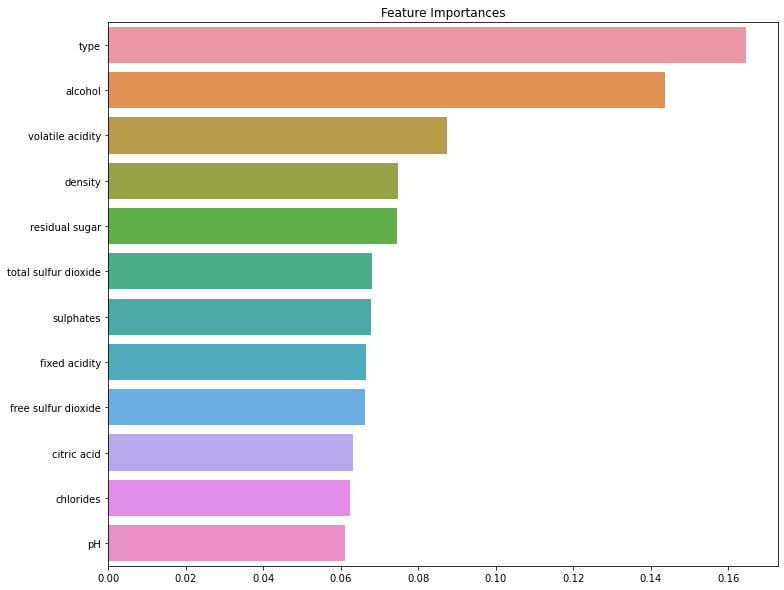

In [48]:
# feature importance

ftr_importances_values = xgb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
sns.barplot(x=ftr_sort, y=ftr_sort.index)
plt.show()

In [49]:
explainer = shap.TreeExplainer(xgb_model) # 트리 모델 Shap Value 계산 객체 지정
shap_values = explainer.shap_values(x_train)

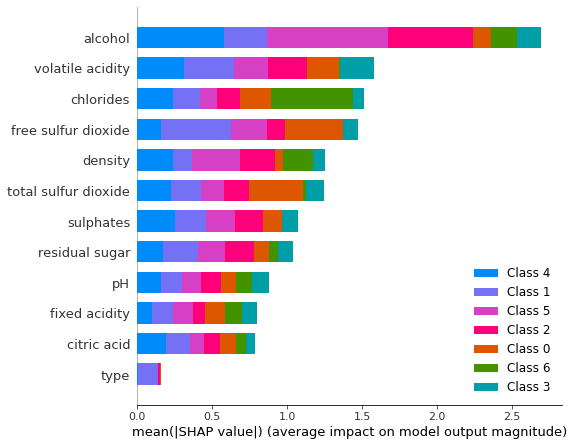

In [23]:
shap.summary_plot(shap_values, x_train)

# Test 적용

In [126]:
test_data = pd.read_csv("./test.csv")
test_data

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,red
996,996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,white
997,997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,red
998,998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,red


In [127]:
test_data.isna().sum()

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [128]:
lab_enc = LabelEncoder()
test_data['type'] = lab_enc.fit_transform(test_data['type'])
test_data['type'].unique()

array([1, 0])

In [129]:
test_data = test_data.drop(['index'], axis = 1)

In [54]:
sc = StandardScaler()
normalized_data = sc.fit_transform(test_data)
col = col = ['quality', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type']
normalized_test = pd.DataFrame(normalized_data, columns = col)
normalized_test

ValueError: Shape of passed values is (1000, 12), indices imply (1000, 13)

In [130]:
xgb_pred = xgb_model.predict(test_data)
xgb_pred = xgb_pred +3

In [131]:
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission['quality'] = xgb_pred
sample_submission.to_csv('submission.csv',index = False)
sample_submission.head()

,index,quality
0,0,5
1,1,5
2,2,6
3,3,5
4,4,6


In [132]:
rf_pred = rf_model.predict(test_data)
rf_pred = rf_pred +3

In [133]:
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission['quality'] = rf_pred
sample_submission.to_csv('submission.csv',index = False)
sample_submission.head()

,index,quality
0,0,5
1,1,5
2,2,6
3,3,5
4,4,6
